# ML Models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

import warnings 
warnings.filterwarnings('ignore')

import spacy

In [2]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tf_idf_vect1 = TfidfVectorizer(min_df=10)
Q1_tfidf_vec = tf_idf_vect1.fit_transform(df['question1'].values.astype('U'))

print("the type of vectorizer ",type(Q1_tfidf_vec))
print('Shape of Question1 tf-idf vector',Q1_tfidf_vec.shape)

the type of vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
Shape of Question1 tf-idf vector (404290, 14889)


In [5]:
tf_idf_vect2 = TfidfVectorizer(min_df=10)
Q2_tfidf_vec = tf_idf_vect2.fit_transform(df['question2'].values.astype('U'))

print("the type of vectorizer ",type(Q2_tfidf_vec))
print('Shape of Question2 tf-idf vector',Q2_tfidf_vec.shape)

the type of vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
Shape of Question2 tf-idf vector (404290, 14265)


In [6]:
from scipy.sparse import hstack

# Combine all the tf-idf features in question1 and question2
question1_question2_features = hstack((Q1_tfidf_vec,Q1_tfidf_vec))

In [7]:
type(question1_question2_features)

scipy.sparse.coo.coo_matrix

In [8]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [9]:
print("Unique Columns Name: ",dfnlp.columns)
print("\nNumber of columns in NLP features: ",len(dfnlp.columns))

dfnlp.head()

Unique Columns Name:  Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

Number of columns in NLP features:  21


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [10]:
print("Unique Columns Name: ",dfppro.columns)
print("\nTotal Number of columns in basic features : ",len(dfppro.columns))

dfppro.head()

Unique Columns Name:  Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

Total Number of columns in basic features :  17


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [11]:
df1 = dfnlp.drop(['qid1','qid2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df  = df1.merge(df2, on='id',how='left')

In [12]:
df.drop(['id','is_duplicate'], axis=1, inplace=True)

In [13]:
print('Columns :-',df.columns)
print("\nTotal Number of features : ",len(df.columns))

# dataframe of both basic and advance features
df.head()

Columns :- Index(['question1', 'question2', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

Total Number of features :  28


,question1,question2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,...,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,...,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,...,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [14]:
# Drop question1 and question2 columns
df.drop(['question1','question2'], axis=1, inplace=True)

In [15]:
# Combine all features
df_features = hstack((df, question1_question2_features),format="csr",dtype='float64')

In [16]:
df_features.shape

(404290, 29804)

In [17]:
# separating class lable from the dataset
class_label = dfnlp['is_duplicate']

# Machine Learning Models

## Random train test split 

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(df_features, class_label, stratify=class_label, test_size=0.3)

## Building a random model (Finding worst-case log-loss)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3

import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [21]:
train_len = len(y_train)
test_len = len(y_test)

Log loss on Test Data using Random Model 0.8860505262762433


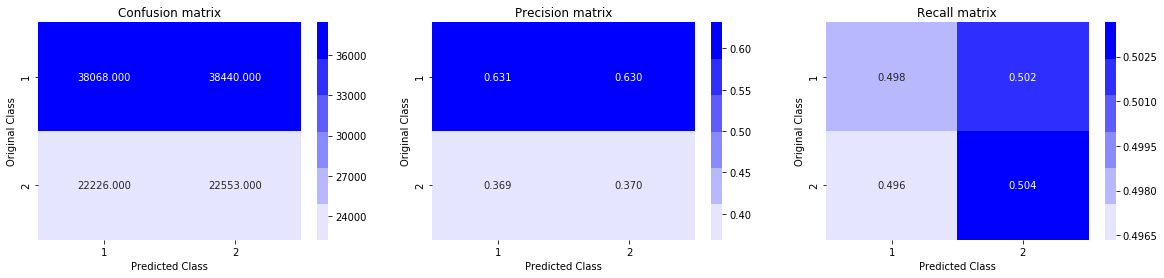

In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data

predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.4506656981037429
For values of alpha =  0.0001 The log loss is: 0.4527624646982995
For values of alpha =  0.001 The log loss is: 0.45500088943646116
For values of alpha =  0.01 The log loss is: 0.4537187835117991
For values of alpha =  0.1 The log loss is: 0.4644748908743533
For values of alpha =  1 The log loss is: 0.4928769033040185
For values of alpha =  10 The log loss is: 0.5466773690514877


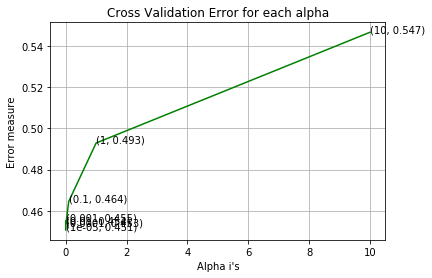

For values of best alpha =  1e-05 The train log loss is: 0.4494410602037009
For values of best alpha =  1e-05 The test log loss is: 0.4506656981037429
Total number of data points : 121287


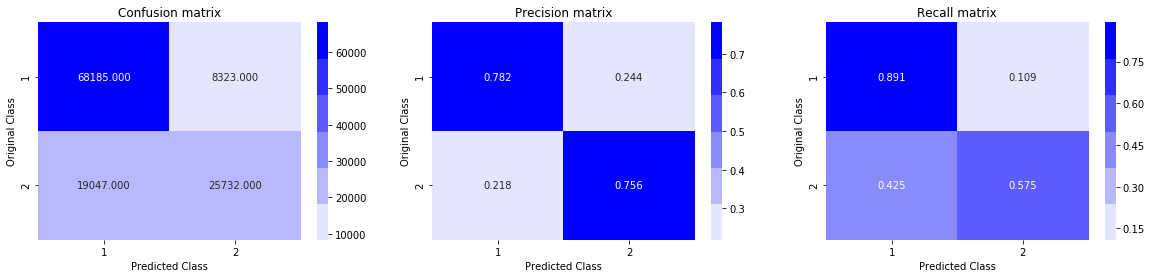

In [23]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Linear SVM with hyperparameter tuning 

For values of alpha =  1e-05 The log loss is: 0.4590739635328182
For values of alpha =  0.0001 The log loss is: 0.4811988250660249
For values of alpha =  0.001 The log loss is: 0.5066054009986103
For values of alpha =  0.01 The log loss is: 0.5161761778781528
For values of alpha =  0.1 The log loss is: 0.49158657442648435
For values of alpha =  1 The log loss is: 0.5816358227831008
For values of alpha =  10 The log loss is: 0.6456260329229139


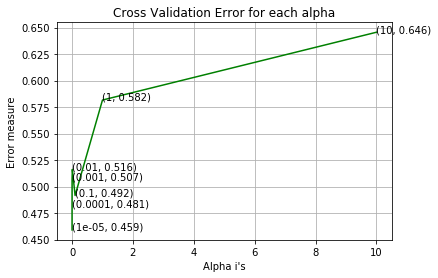

For values of best alpha =  1e-05 The train log loss is: 0.4574235899667149
For values of best alpha =  1e-05 The test log loss is: 0.4590739635328182
Total number of data points : 121287


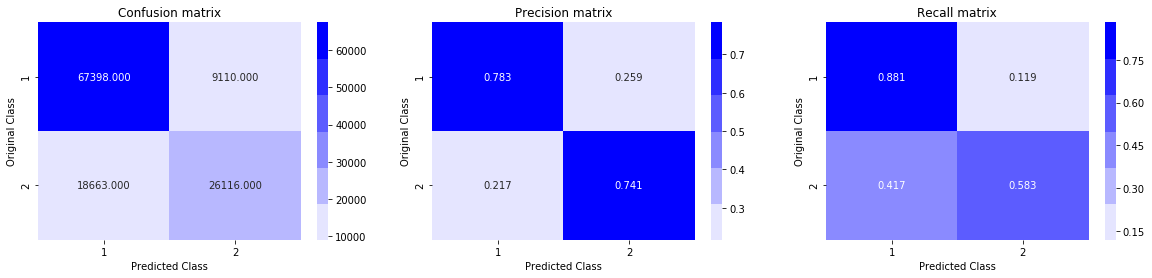

In [24]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# XGboost implementation with hyperparameter tuning 

In [25]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

start = dt.datetime.now()

parameter = {
        'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
     'n_estimators':[100, 300, 500, 700, 900, 1100],
     'max_depth':[i for i in range(1,5)],
    }

Xgb_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(Xgb_model, parameter, scoring="neg_log_loss",pre_dispatch = 2, n_jobs=-1, cv= 5)
random_search.fit(X_train, y_train)
    
print('The Best Parameters are: \n')
print(random_search.best_params_)


print("\nTimeTaken for XGboost Model: ",dt.datetime.now() - start)

The Best Parameters are: 

{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.3}

TimeTaken for XGboost Model:  3:40:14.169056


In [31]:
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.3,n_estimators=300)
                        
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_test)
log_loss(y_test, predict_y, eps=1e-15)
print("The log loss is:",log_loss(y_test, predict_y,  eps=1e-15))

The log loss is: 0.3386131228947703


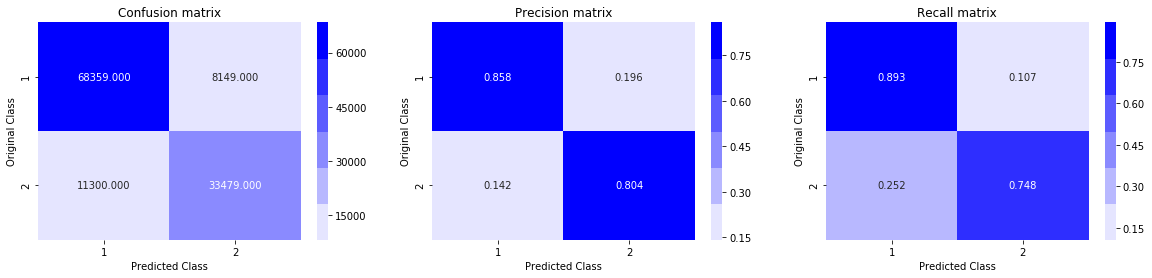

In [29]:
plot_confusion_matrix(y_test, predict_y)

In [5]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "log loss"]

x.add_row(["Random model", 0.8860])

x.add_row(["Logistic Regression With Hyperparameter Tuning", 0.4494])

x.add_row(["LinearSVM With Hyperparameter Tuning", 0.4574])

x.add_row(["XGboost With Hyperparameter Tuning", 0.3386])

print(x)

+------------------------------------------------+----------+
|                     Model                      | log loss |
+------------------------------------------------+----------+
|                  Random model                  |  0.886   |
| Logistic Regression With Hyperparameter Tuning |  0.4494  |
|      LinearSVM With Hyperparameter Tuning      |  0.4574  |
|       XGboost With Hyperparameter Tuning       |  0.3386  |
+------------------------------------------------+----------+
